### Załadowanie bibliotek

In [1]:
#zaladowanie potrzebnych bibliotek
print('Ładujemy biblioteki')
# import csv #This package lets us save data to a csv file
from selenium import webdriver #The Selenium package we'll need
import time #This package lets us pause execution for a bit
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import re
from bs4 import BeautifulSoup # do pobrania recenzji potrzebne, jakby scrolluje sobie po kolei kazda recenzje
from selenium.webdriver.support import expected_conditions as EC
import sqlite3
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.action_chains import ActionChains
import random
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import nltk
import os
# nltk.download('punkt')
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from art import *
import warnings
warnings.filterwarnings("ignore")
print('Wszystkie biblioteki zostały załadowane pomyślnie')
time.sleep(1)

Ładujemy biblioteki
Wszystkie biblioteki zostały załadowane pomyślnie


In [2]:
Art = text2art("Witamy   w   SA     Reviews","tarty1", 'small')
print(Art)
time.sleep(1)

           
░██╗░░░░░░░██╗██╗████████╗░█████╗░███╗░░░███╗██╗░░░██╗   ░██╗░░░░░░░██╗   ░██████╗░█████╗░     ██████╗░███████╗██╗░░░██╗██╗███████╗░██╗░░░░░░░██╗░██████╗
░██║░░██╗░░██║██║╚══██╔══╝██╔══██╗████╗░████║╚██╗░██╔╝   ░██║░░██╗░░██║   ██╔════╝██╔══██╗     ██╔══██╗██╔════╝██║░░░██║██║██╔════╝░██║░░██╗░░██║██╔════╝
░╚██╗████╗██╔╝██║░░░██║░░░███████║██╔████╔██║░╚████╔╝░   ░╚██╗████╗██╔╝   ╚█████╗░███████║     ██████╔╝█████╗░░╚██╗░██╔╝██║█████╗░░░╚██╗████╗██╔╝╚█████╗░
░░████╔═████║░██║░░░██║░░░██╔══██║██║╚██╔╝██║░░╚██╔╝░░   ░░████╔═████║░   ░╚═══██╗██╔══██║     ██╔══██╗██╔══╝░░░╚████╔╝░██║██╔══╝░░░░████╔═████║░░╚═══██╗
░░╚██╔╝░╚██╔╝░██║░░░██║░░░██║░░██║██║░╚═╝░██║░░░██║░░░   ░░╚██╔╝░╚██╔╝░   ██████╔╝██║░░██║     ██║░░██║███████╗░░╚██╔╝░░██║███████╗░░╚██╔╝░╚██╔╝░██████╔╝
░░░╚═╝░░░╚═╝░░╚═╝░░░╚═╝░░░╚═╝░░╚═╝╚═╝░░░░░╚═╝░░░╚═╝░░░   ░░░╚═╝░░░╚═╝░░   ╚═════╝░╚═╝░░╚═╝     ╚═╝░░╚═╝╚══════╝░░░╚═╝░░░╚═╝╚══════╝░░░╚═╝░░░╚═╝░░╚═════╝░


## WEB-SCRAPING RECENZJI

### Podanie ścieżki do sterownika Chromedriver

In [3]:
trwaj = True
chromedriver_path = ''
while trwaj:
    tworca = input('Czy jesteś twórcą aplikacji? (Tak/Nie) ')
    
    if tworca.lower() == 'tak':
        imie = input('Podaj swoje imie\n')
        
        if imie.lower() == 'kasia':
            chromedriver_path = "C:\\Users\\Public\\chromedriver_win32\\chromedriver.exe"
            
        elif imie.lower() == 'adela':
            chromedriver_path = 'C:\\Users\\Lenovo\\Desktop\\chromedriver.exe'
            
        elif imie.lower() == 'marta':
            chromedriver_path = "C:\\chromedriver_win32\\chromedriver.exe"
        
        if not os.path.exists(chromedriver_path):
            print("Coś się pomyliłeś")
            time.sleep(1)
        else:
            trwaj = False
        
    elif tworca.lower() == 'nie':
        print("Podaj ścieżkę do sterownika Chromedriver na Twoim komputerze, upewnij się, że dobrze "
              "ją wpisałeś")
        chromedriver_path=input()
        time.sleep(1)
        
        if chromedriver_path.endswith('chromedriver.exe') and os.path.exists(chromedriver_path):
            trwaj = False
        else:
            print('To nie to. Spróbuj jeszcze raz:')
            time.sleep(1)
    else:
        print('Prosimy spróbować jeszcze raz')
        time.sleep(1)

Czy jesteś twórcą aplikacji? (Tak/Nie) tak
Podaj swoje imie
marta


### Uruchamianie tripadvisor

In [4]:
print('Uruchamiamy stronę tripadvisor')
time.sleep(1)

url = "https://www.tripadvisor.com/"


options = Options()
#options.add_argument('--headless')
options.add_argument('--disable-gpu')
options.add_argument('log-level=3')
s = Service(chromedriver_path)
driver = webdriver.Chrome(service = s, options=options)#uruchomienie Chrome
driver.get(url) #otworzenie strony z recenzjami 
driver.maximize_window() #maksymalizacja okna przeglądarki
time.sleep(1)

Uruchamiamy stronę tripadvisor


### Automatyczna akceptacja plików cookies

In [5]:
#automatyzacja akceptacji plików cookies
button=driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]') #automatyzacja akceptacji cookies
button.click()
time.sleep(1)

print('Akceptacja plików cookies przebiegła pomyślnie')

Akceptacja plików cookies przebiegła pomyślnie


### Wyszukiwanie restauracji

In [6]:
restaurant_name = input('Podaj pełną nazwę restauracji którą chcesz wyszukać (możesz też adres dla '
                        'lepszego wyszukiwania):\n')
# restaurant_name = "L'Entre Villes Restaurant"
# restaurant_name = "Couqley French Bistro & Bar Dubai" ponad 2000 recenzji, 19 min szło
# restaurant_name = "Chianti Grill Bar Sopot"
# restaurant_name = "Pierogarnia Mandu Kaprów 19d, 80-316 Gdańsk"
time.sleep(1)
print('Trwa wyszukiwanie restauracji')

inputElement = driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[3]/div/div/div/form/input[1]')
inputElement.clear()
inputElement.send_keys(restaurant_name)
time.sleep(3)
inputElement.send_keys(Keys.ENTER)
# inputElement.click()
time.sleep(10)
print('Przenosimy się na stronę restauracji')

restaurant_to_click = driver.find_element(By.CLASS_NAME, "ui_columns.is-mobile.result-content-columns")
restaurant_to_click.click()
time.sleep(10)

driver.close()
window_after = driver.window_handles[0]
time.sleep(10)
driver.switch_to.window(driver.window_handles[0])

# inputElement = driver.find_element(By.CLASS_NAME, "GzJDZ.w.z._S._F.Wc.Wh.Q.B-._G")
# inputElement.click()
# time.sleep(3)
time.sleep(3)
try:
    print(driver.find_element(By.CLASS_NAME, 'HjBfq').text)
    print(driver.find_element(By.CLASS_NAME, 'yEWoV').text)
    good_rest = input('Czy to ta restauracja? ')
    time.sleep(1)
    
    if good_rest.lower() == 'tak':
        print('Restauracja będzie wykorzystywana w dalszym procesie')
    else:
        print('Może spróbuj dopisać adres?')
        print('W wersji beta musisz załadować aplikację jeszcze raz by poprawić wyszukiwanie, dziękujemy'
             'za poświęcony czas :)')
except:
    print('No cóż, wersji beta musisz załadować aplikację jeszcze raz by poprawić wyszukiwanie, dziękujemy '
             'za poświęcony czas :)')
    exit()

Podaj pełną nazwę restauracji którą chcesz wyszukać (możesz też adres dla lepszego wyszukiwania):
Chianti Grill Bar
Trwa wyszukiwanie restauracji
Przenosimy się na stronę restauracji
Chianti Grill Bar
Generala Kazimierza Pulaskiego 19/1, Sopot 81-759 Poland
Czy to ta restauracja? tak
Restauracja będzie wykorzystywana w dalszym procesie


### Liczba dostępnych recenzji

In [7]:
#liczba wszystkich dostępnych do pobrania recenzji
time.sleep(1)
reviews_amount = int(re.sub(r'[^\w]', '', driver.find_element("xpath",'//*[@id="taplc_detail_filters_rr_resp_0"]\
/div/div[1]/div/div[2]/div[4]/div/div[2]\
/div[1]/div[2]/label/span[2]').text))

print(f'Liczba recenzji do pobrania z TripAdvisor: {reviews_amount}')
time.sleep(1)

Liczba recenzji do pobrania z TripAdvisor: 31


### Tworzenie bazy danych 

In [8]:
#utworzenie bazy lub połączenie z już utworzoną
conn = sqlite3.connect('reviews_restaurant.db', timeout = 10)
c = conn.cursor() #utworzenie 'kursora' do wykonywania poleceń na bazie
#tabela z recenzjami
existing_table = c.execute(
  """SELECT name FROM sqlite_master WHERE type='table' AND name = 'Restaurant_reviews'\
  ;""").fetchall()
if existing_table != []:
    c.execute("DROP TABLE Restaurant_reviews")
    
#tabela z recenzjami, z kluczem obcym do id restauracji
c.execute("CREATE TABLE Restaurant_reviews (Review_id INTEGER PRIMARY KEY,\
          Reviewer_Username TEXT NOT NULL, Review_Date DATE NOT NULL,Review_Text TEXT, Rating INT )")

print('Utworzono bazę danych dla restauracji')

Utworzono bazę danych dla restauracji


### Ściąganie recenzji - web-scraping

In [9]:
time.sleep(1)
print('Zaczynam ściągać recenzje')

start_time = time.time()

nextPage = True
soup = BeautifulSoup(driver.page_source, 'html.parser')

# restaurantid = ''
# for word in  restaurant_name.split(' '):
#     restaurantid += word[0]
# restaurantid = restaurantid + ''.join(random.choices([str(i) for i in range(10)], k = 3)) #tworzymy id restauracji
# c.execute("INSERT INTO Restaurants VALUES(?,?)",(restaurantid, restaurant_name)) 

while nextPage:
#     driver.get(url)
    time.sleep(3)
    # more jest po to by zobaczyć wsyzstkie recenzje na stronie, klika w przycisk "more"
    try:
        more = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH,
                                                                           "//span[@class='taLnk ulBlueLinks']")))
        more.click()
    except:
        print('Aplikacja działa dalej, poradziliśmy sobie z ładowaniem recenzji, nie martw się'\
             ,'wszystko zostanie pobrane! ')
        print(c.execute("SELECT count(*) FROM Restaurant_reviews").fetchone()[0])
    
    time.sleep(10) 
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    results = soup.find('div', class_='listContainer hide-more-mobile')
    
    #gdyby nie znalazł danej klasy w kodzie źródłowym 
    try:
        reviews = results.find_all('div', class_='prw_rup prw_reviews_review_resp')
    except Exception:
         continue
        
    try:
        for review in reviews:
            
            ratingDate = review.find('span', class_='ratingDate').get('title')
            text_review = review.find('p', class_='partial_entry')
            
            if len(text_review.contents) > 2:
                reviewText = str(text_review.contents[0]) + ' ' + str(text_review.contents[-1])
            else:
                reviewText = text_review.text
                
            reviewerUsername = review.find('div', class_='info_text pointer_cursor')
            reviewerUsername = reviewerUsername.select('div > div')[0].get_text(strip=True)
            rating = review.find('div', class_='ui_column is-9').findChildren('span')
            rating = str(rating[0]).split('_')[3].split('0')[0]
            c.execute("INSERT INTO Restaurant_reviews VALUES(NULL,?,?,?,?)",
                      (reviewerUsername, ratingDate, reviewText, rating))
            conn.commit()
            if c.execute("SELECT count(*) FROM Restaurant_reviews").fetchone()[0] == int(reviews_amount/2):
                print('Przede mną jeszcze tylko połowa recenzji do ściągnięcia')
                time.sleep(5)
    except: # jeśli się posuje to nie wyskoczy błąd, a nasza baza danych będzie pusta
        pass

    try: #przechodzimy do kolejnej strony recenzji
        unModifiedUrl = str(soup.find('a', class_ = 'nav next ui_button primary',href=True)['href'])
        url = 'https://www.tripadvisor.com' + unModifiedUrl
        driver.get(url)
        if url == 'https://www.tripadvisor.com': #jak już jest koniec to przerywamy pętlę while
            nextPage = False
    except:
        nextPage = False
        
print(f'Czas ściągania recenzji: {(time.time()-start_time)/60} min!')
time.sleep(1)
print('Web-scraping został zakończony')

Zaczynam ściągać recenzje
Przede mną jeszcze tylko połowa recenzji do ściągnięcia
Czas ściągania recenzji: 0.8555059989293416 min!
Web-scraping został zakończony


### Kompletność pobranych recenzji

In [10]:
#sprawdzenie czy wszystkie recenzje się pobrały

time.sleep(3)
reviews_amount_success = c.execute("SELECT count(*) FROM Restaurant_reviews").fetchone()[0]
if reviews_amount_success == reviews_amount:
    print("Web-scraping zakończony skucesem")
    time.sleep(3)
else:
    print(reviews_amount_success)
    print("Nie wszystkie recenzje zostały pobrane, spróbuj ponownie od początku")
    exit()

Web-scraping zakończony skucesem


## ANALIZA SENTYMENTU

### Liczba pobranych recenzji

In [11]:
#wyswietlenie liczby recenzji
time.sleep(1)
print("Liczba recenzji, które zostaną poddane analizie: ",reviews_amount_success)

Liczba recenzji, które zostaną poddane analizie:  31


### Średnia liczba gwiazdek

In [12]:
#średnia liczba gwiazdek 

reviews = pd.read_sql_query("SELECT Review_id, Review_Date, Review_Text, Rating FROM Restaurant_reviews", conn)
reviews["Review_Date"] = pd.to_datetime(reviews["Review_Date"])
conn.row_factory = lambda cursor, row: row[0] #to sprawi,
# że bedzie wyswietlac dane w selecie jako pojedyncze wartosci z kazdego wiersza czyli np. rating 3 a nie (3,) 
c = conn.cursor()
rating = c.execute("SELECT rating FROM Restaurant_reviews").fetchall()
rating_sum = c.execute("SELECT sum(rating) FROM Restaurant_reviews").fetchone()
rating_avg = round(rating_sum/reviews_amount_success,2)

if isinstance(rating_avg, float):
    print("Na skali od 1 do 5 restauracja otrzymała średnią ocenę: ", rating_avg)
else:
    print('Aplikacja napotkała błąd. Proszę spróbować ponownie')
    exit()
conn.row_factory = None

Na skali od 1 do 5 restauracja otrzymała średnią ocenę:  4.06


### Wykres - ilość recenzji w latach

Przedstawiam parę wykresów


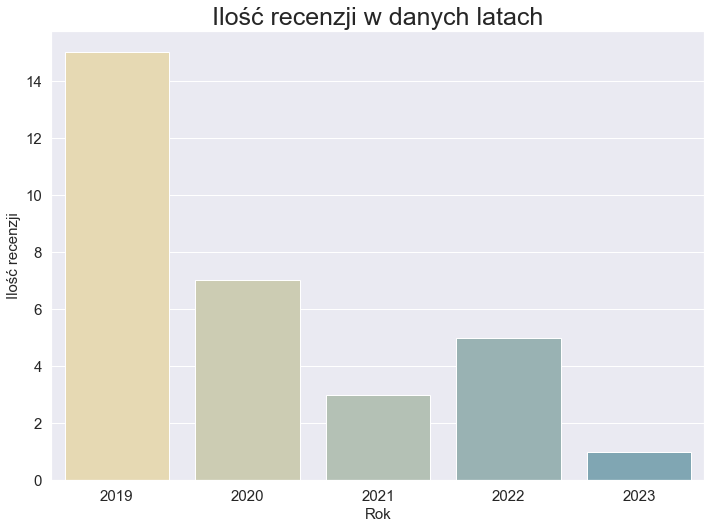

In [13]:
#ilość recenzji po roku

time.sleep(1)
print('Przedstawiam parę wykresów')
time.sleep(1)
count_year = reviews.groupby(reviews["Review_Date"].dt.year).size().reset_index(name = 'count') 

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot1 = sns.barplot(x = "Review_Date", y = "count", data=count_year, palette="blend:#EDA,#7AB") 
plt.xlabel("Rok", fontsize = 15)
plt.ylabel("Ilość recenzji", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Ilość recenzji w danych latach", fontsize = 25)
plt.show()

### Wykres - ilość recenzji po miesiącach 

Następny wykres


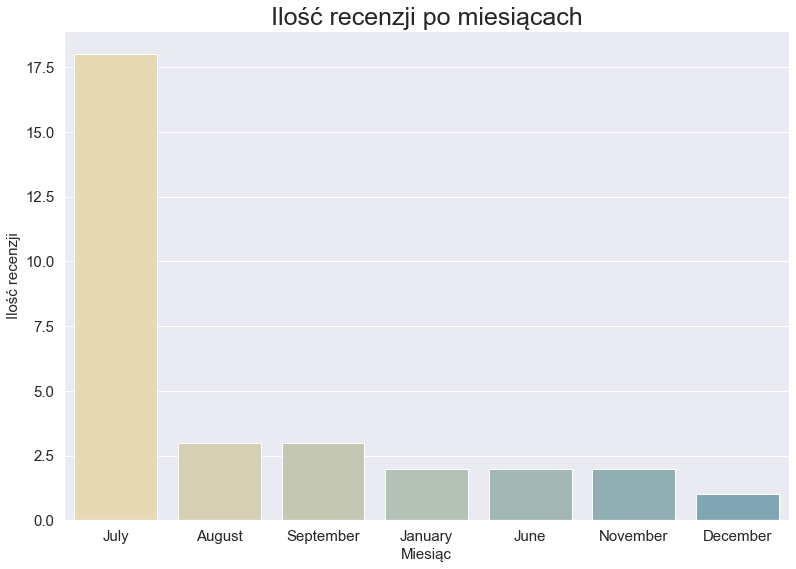

In [14]:
#ilość recenzji po miesiącu
print('Następny wykres')
time.sleep(1)
count_month = reviews.groupby(reviews["Review_Date"].dt.month_name()).size().reset_index(name = 'count')

sns.set(rc={'figure.figsize':(13,9)})
plot1 = sns.barplot(x = "Review_Date", y = "count", data = count_month, 
                    order = count_month.sort_values('count', ascending=False).Review_Date, palette="blend:#EDA,#7AB") 
plt.xlabel("Miesiąc", fontsize = 15) 
plt.ylabel("Ilość recenzji", fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title("Ilość recenzji po miesiącach", fontsize = 25)
plt.show()

### Wykres ocen

Czy chcesz zobaczyć  wykres ocen? tak
Oto wykres


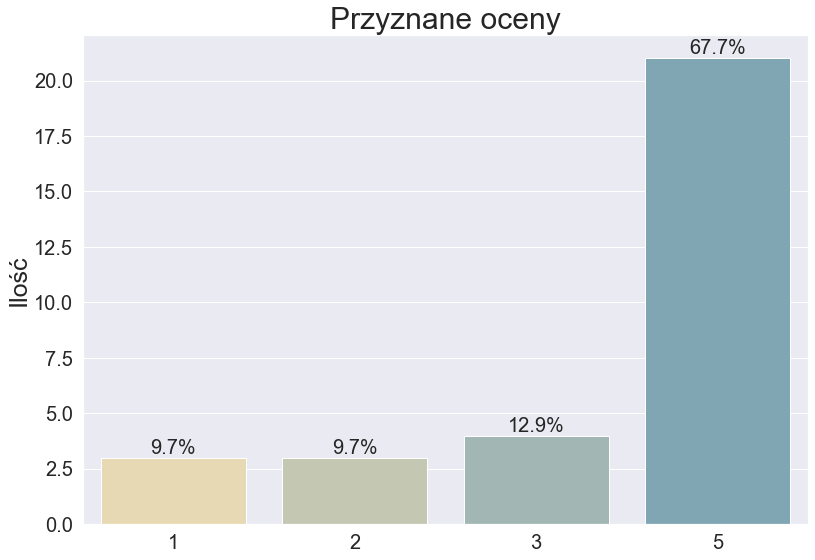

In [15]:
time.sleep(3)
czy_chce = input('Czy chcesz zobaczyć  wykres ocen? ')

while True:
    if czy_chce.lower() == 'tak':
        print('Oto wykres')

        # wykres ocen        

        ilosc_ocen = {ocena : rating.count(ocena) for ocena in set(rating)}
        ilosc_ocen

        ax = sns.barplot(list(ilosc_ocen.keys()), list(ilosc_ocen.values()), ci="sd", palette="blend:#EDA,#7AB")

        for c in ax.containers:
            labels = [f'{h/len(rating)*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]

            ax.bar_label(c, labels=labels, label_type='edge', fontsize = 20)
        # g.despine(left=True)

        plt.xlabel('')
        plt.ylabel("Ilość", fontsize = 25)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.title("Przyznane oceny", fontsize=30)
        break
    elif czy_chce.lower() == 'nie':
        print('Żałuj.')
        break
    else:
        czy_chce = input('Nie rozumiem Cię, to chcesz czy nie??\n')
        continue

### Wykres - zmiana średnich ocen w czasie

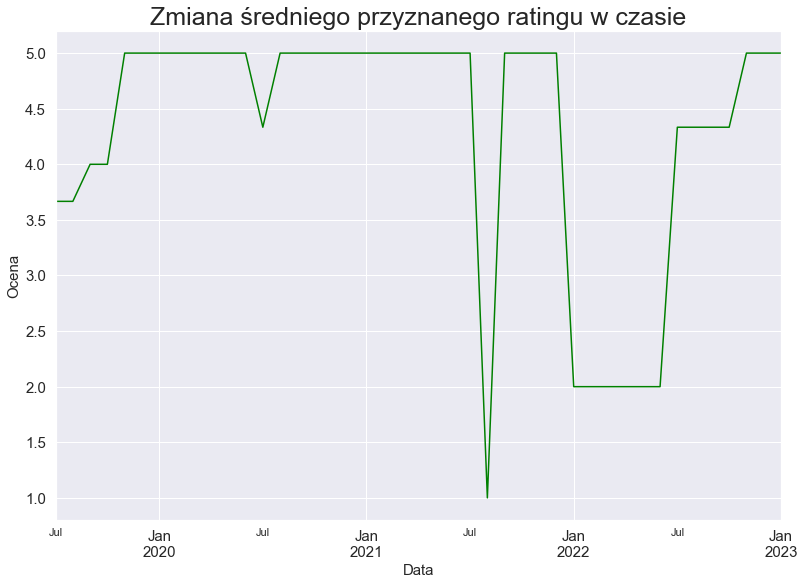

In [16]:
#Przyznawany rating po dacie
time.sleep(3)
rating_df=reviews[['Review_Date','Rating']]
rating_df = rating_df.set_index(pd.DatetimeIndex(rating_df.iloc[:,0]))
rating_df.drop(rating_df.columns[0], 1, inplace=True)
rating_df.resample('M').mean().fillna(method='ffill').plot(legend = False, color = 'green')
plt.ylabel('Ocena', fontsize = 15)
plt.xlabel('Data', fontsize = 15)
plt.title("Zmiana średniego przyznanego ratingu w czasie", fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.show()

### Utworzenie data frame z recenzjami

In [17]:
#tworzymy dataframe z recenzjami
time.sleep(3)
print('Przedstawiam pierwsze 5 recenzji')

print(reviews.head())

Przedstawiam pierwsze 5 recenzji
   Review_id Review_Date                                        Review_Text  \
0          1  2023-01-07  it's a very good restaurant, highly recommende...   
1          2  2022-11-08  Perfect Italian Food And atmosphere! Fine wine...   
2          3  2022-07-24  You need to try the Mule, the sauce that came ...   
3          4  2022-07-18  Very good food! Service was okay, friendly and...   
4          5  2022-07-18  Fantastic food and service. We've visited seve...   

   Rating  
0       5  
1       5  
2       5  
3       3  
4       5  


### Oczyszczanie danych

In [18]:
time.sleep(3)
print('Trwają procesy które są nudne, poczekaj chwilę...')

#czyszczenie tekstu z liczb, symboli, znakow interpunkcyjnych itp

def clean(review):
    review = re.sub('[^A-Za-z]+', ' ', review).lower() #wszystko co nie jest literą zamieni na spację
    return review

reviews['Review_Text_Clean'] = reviews['Review_Text'].apply(clean)

if reviews['Review_Text_Clean'].all():
    time.sleep(3)
    print('Usunęliśmy znaki interpunkcji z recenzji...')

Trwają procesy które są nudne, poczekaj chwilę...
Usunęliśmy znaki interpunkcji z recenzji...


### Usunięcie stopwords

In [19]:
#usuniecie stopwords- nic nieznaczace wyrazy typu "I", "then", ale zostawiamy "not" do dalszej analizy

nltk.download('stopwords')

stopwords= set(stopwords.words("english"))
stopwords.remove('not')
reviews['Review_Text_Clean'] = reviews['Review_Text_Clean'
                                      ].apply(lambda x: ' '.join([word for word in x.split() 
                                                                  if word not in (stopwords)]))
if reviews['Review_Text_Clean'].all():
    time.sleep(3)
    print('... oraz usunęliśmy stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


... oraz usunęliśmy stopwords


### Procentowy wskaźnik sentymentu

In [20]:
# funkcja która na podstawie wskaźnika sentymentu klasyfikuje recenzje jako pozytywną/ neutralną/negatywną

def sentiment_opinion(sentiment_rate):
    
    if sentiment_rate >= 0.5:
        return 'positive'
    
    elif sentiment_rate <= - 0.25:
        return 'negative'
    
    else:
        return 'neutral'

In [21]:
#analiza sentymentu- wskaźnik sentymentu

analyzer = SentimentIntensityAnalyzer()
reviews['sentiment_rate'] = [analyzer.polarity_scores(x)['compound'] for x in reviews['Review_Text']]

if reviews['sentiment_rate'].all():
    time.sleep(3)
    print('...Dodaliśmy funckję oceny sentymentu')


#klasyfikacja recenzji

reviews['sentiment_opinion'] = reviews['sentiment_rate'].apply(sentiment_opinion)
time.sleep(3)

if reviews['sentiment_opinion'].all():
    time.sleep(3)
    print('Dzięki czemu mogliśmy zaklasyfikować recenzje na pozytywne, neutralne i negatywne')

...Dodaliśmy funckję oceny sentymentu
Dzięki czemu mogliśmy zaklasyfikować recenzje na pozytywne, neutralne i negatywne


In [22]:
#klasyfikacje recenzji procentowo

reviews_percentage = round(reviews['sentiment_opinion'].value_counts()/reviews['sentiment_opinion'].count() * 100,2)
time.sleep(3)
print('Twoja restauracja ma:')

czy_sto = 0
for typ in list(reviews_percentage.index):
    typ_recenzji = reviews_percentage[typ]
    czy_sto += typ_recenzji
    if typ == 'positive':
        print("Pozytywnych recenzji: " + str(typ_recenzji) + "%")   
        
    elif typ == 'negative':
        print("Negatywnych recenzji: " + str(typ_recenzji) + "%")
        
    elif typ == 'neutral':
        print("Neutralnych recenzji: " + str(typ_recenzji) + "%")

if round(czy_sto) != 100:
    print('Wynik się nie zgadza, spróbuj jeszcze raz')


Twoja restauracja ma:
Pozytywnych recenzji: 80.65%
Neutralnych recenzji: 12.9%
Negatywnych recenzji: 6.45%


### Średni wskaźnik sentymentu

In [23]:
#średni wskaźnik sentymentu
time.sleep(3)
avg_sentiment_rate=round(reviews['sentiment_rate'].mean(),4)
avg_sentiment_rate
time.sleep(1)
print("Średni wskaźnik sentymentu dla restauracji wynosi: ",avg_sentiment_rate)

### czy jest -1 do 1

#tu dać wykres średni wskaznik sentymentu vs czas (miesiace/lata), tylko trzeba dac do dataframe jeszcze daty

Średni wskaźnik sentymentu dla restauracji wynosi:  0.6977


### Mapa słów

Mapa najczęściej występujących słów we wszystkich recenzjach


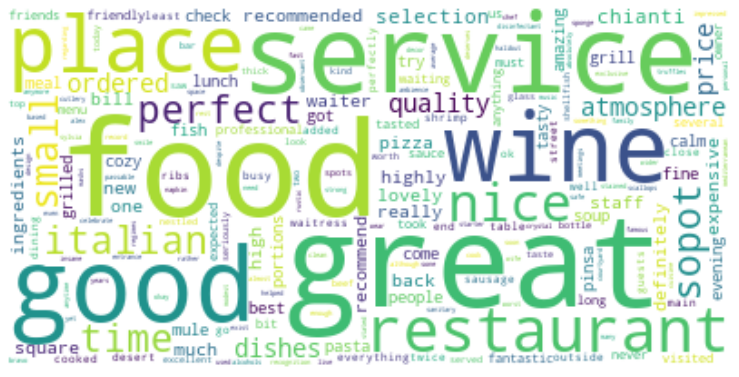

In [24]:
#WordCloud najczęściej występujących słów

# polaczenie wszystkich recenzji
time.sleep(3)
print('Mapa najczęściej występujących słów we wszystkich recenzjach')
full_text_reviews = ' '.join(reviews['Review_Text_Clean'])
#WordCloud najczęściej występujących słów

cloud_no_stopword = WordCloud(background_color='white').generate(full_text_reviews)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

time.sleep(4)


### Mapa słów - pozytywne

Mapa najczęściej występujących słów w pozytywnych recenzjach


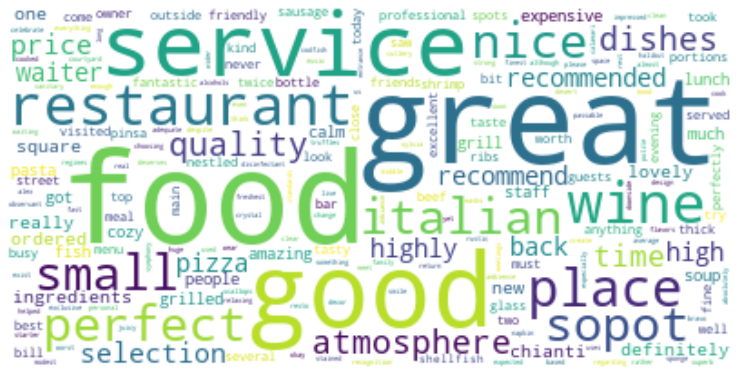

In [25]:
time.sleep(3)
print('Mapa najczęściej występujących słów w pozytywnych recenzjach')
reviews_positive=reviews.loc[reviews['sentiment_opinion'] == 'positive']
full_text_reviews_positive = ' '.join(reviews_positive['Review_Text_Clean'])
#WordCloud najczęściej występujących słów

cloud_no_stopword = WordCloud(background_color='white').generate(full_text_reviews_positive)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

### Mapa słów - negatywne

Mapa najczęściej występujących słów w negatywnych recenzjach


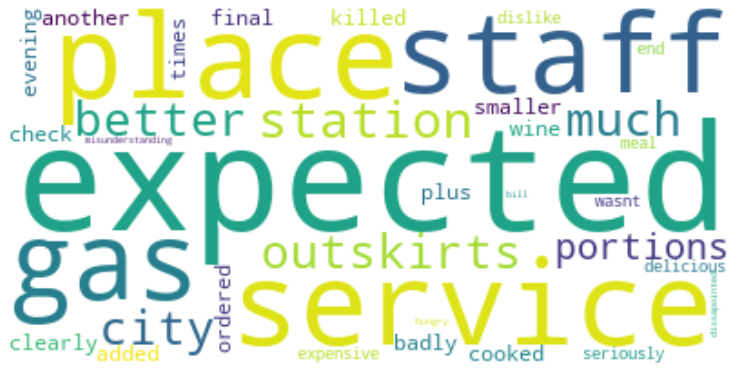

In [26]:
time.sleep(3)
print('Mapa najczęściej występujących słów w negatywnych recenzjach')
reviews_negative=reviews.loc[reviews['sentiment_opinion'] == 'negative']
full_text_reviews_negative = ' '.join(reviews_negative['Review_Text_Clean'])
#WordCloud najczęściej występujących słów

cloud_no_stopword = WordCloud(background_color='white').generate(full_text_reviews_negative)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

### Stworzenie kategorii

In [27]:
# szukamy jakimi cechami zostały opisane elementy typu wystroj, jedzenie, obsluga
# tworzymy kolumne z slowami ktore wystepowaly blisko tych kategorii
time.sleep(3)


def feature(text_clean):
    
    text = text_clean.split(' ')
    features = []
    items = ['restaurant', 'service', 'food', 'staff', 'place', 'standard', 'atmosphere', 'wine', 'interior']
    
    for item in items:
        if item in text:
            
            for i in range(text.count(item)):
                nb_in = text.index(item)
                
                if nb_in < 3:
                    features.append(text[: nb_in + 3])
                else:
                    features.append(text[nb_in-2: nb_in + 3])
    return features

reviews['Features'] = reviews['Review_Text_Clean'].apply(feature)

In [28]:
# polaczenie slowa not z poprzedzajacym aby lepiej znalezc co bylo nie tak
# tworzymy slownik z kategoriami i cechami ktore je opisuja 
features = list(reviews['Features'])
features1 = [feat for rev in features for feat in rev]
features2 = []

for feature in features1:
    row = []
    
    for i in range(len(feature)):
        
        if 'not' != feature[i] or (i == (len(feature) - 1)):
            row.append(feature[i])
        else:
            new_item =  feature[i] + ' ' + feature[i + 1]
            row.append(new_item)
            
    features2.append(row)
    
items = ['restaurant', 'service', 'food', 'staff', 'place', 'standard', 'atmosphere', 'wine', 'interior']
dict_features = {item: [i for row in features2 for i in row if (item in row) and (i not in items)] for item in items}

In [29]:
# znajdujemy najczesciej uzywane slowa opisujace dana kategorie i wstawiamy do tabeli

features_count = {}

for key in dict_features.keys():
    features_count_dict = FreqDist(dict_features[key])
    features_count[key] = pd.DataFrame(features_count_dict.most_common(30),columns=['Word', 'Frequency'])
print('Przyjrzyjmy się jak widzą klienci Twoją restaurację, czyli charakterystyka danych kategorii')

Przyjrzyjmy się jak widzą klienci Twoją restaurację, czyli charakterystyka danych kategorii


### Najczęściej występujące słowa w danej kategorii

In [30]:
print('Wybierz kategorię dla której chciałbyś dowiedzieć jak najczęściej opisują ją klienci')
print(items)
choosed_item = input()

while True:
    
    if choosed_item.lower() in items:
        
        print(features_count[choosed_item])
        print('Czy chcesz zobaczyć jeszcze jakąś inną kategorię? Jeśli tak podaj nazwę, albo wpisz nie lub '
                      'wciśnij enter\n aby zakończyć program')
        print(items)
        dalej = input()

        if (dalej == '') or (dalej.lower() == 'nie'):
            break
        elif dalej.lower() in items:
            continue
            
    print('Nie ma takiej kategorii')
    print('Wybierz kategorię dla której chciałbyś dowiedzieć jak najczęściej opisują ją klienci')
    print(items)
    choosed_item = input()

Wybierz kategorię dla której chciałbyś dowiedzieć jak najczęściej opisują ją klienci
['restaurant', 'service', 'food', 'staff', 'place', 'standard', 'atmosphere', 'wine', 'interior']
restaurant
           Word  Frequency
0          good          2
1         small          2
2      friendly          2
3         great          2
4          fine          2
5        highly          1
6   recommended          1
7          nice          1
8        design          1
9    everything          1
10     scallops          1
11      amazing          1
12       dishes          1
13         mood          1
14     symphony          1
15          top          1
16          new          1
17         must          1
18          eat          1
19    decorated          1
20   resembling          1
21          one          1
Czy chcesz zobaczyć jeszcze jakąś inną kategorię? Jeśli tak podaj nazwę, albo wpisz nie lub wciśnij enter
 aby zakończyć program
['restaurant', 'service', 'food', 'staff', 'place', 'sta